In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("csv/gameandgrade.csv")

# Clean Data because of typo error on the csv file with Grade having a double dot (eg. 92..00)
data = data[~data["Grade"].astype(str).str.contains(r"\.\..", regex=True)]
# Convert Grade column into Numeric Value (invalid values and non-numeric values = NaN)
data["Grade"] = pd.to_numeric(data["Grade"], errors="coerce")
# Remove NaN (previously invalid and non-numeric values) fron the data set
data.dropna(subset=["Grade"], inplace=True)

# Check cleaned data
data.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.5
1,1,1,1,3,1,1,1,3,3,83.0
2,0,1,0,0,0,0,1,3,3,80.0
3,0,1,3,5,1,1,2,2,3,45.0
4,1,1,1,1,2,1,1,3,4,85.0


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               769 non-null    int64  
 1   School Code       769 non-null    int64  
 2   Playing Years     769 non-null    int64  
 3   Playing Often     769 non-null    int64  
 4   Playing Hours     769 non-null    int64  
 5   Playing Games     769 non-null    int64  
 6   Parent Revenue    769 non-null    int64  
 7   Father Education  769 non-null    int64  
 8   Mother Education  769 non-null    int64  
 9   Grade             769 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 66.1 KB


,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,0.499350,4.945384,1.586476,2.245774,1.490247,0.707412,1.837451,3.717815,3.409623,77.500039
std,0.500325,3.001672,1.407060,1.923183,1.337644,0.458098,1.064753,1.172474,1.177020,16.513588
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,65.000000
50%,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,2.000000,5.000000,4.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000,100.000000


In [4]:
X = data[["Playing Hours"]]
Y = data["Grade"]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
print("Training Set:")
print(X_train)
print(Y_train)

print ("\n Testing Set:")
print(X_test)
print(Y_test)



Training Set:
     Playing Hours
60               0
619              0
346              1
294              5
231              1
..             ...
71               2
106              0
270              0
436              0
102              1

[615 rows x 1 columns]
60      95.0
619    100.0
346     80.0
294     60.0
231     85.0
       ...  
71      70.0
106     72.5
270     70.0
436    100.0
102     70.0
Name: Grade, Length: 615, dtype: float64

 Testing Set:
     Playing Hours
670              3
324              2
626              0
692              0
474              1
..             ...
355              1
535              2
344              2
296              2
463              1

[154 rows x 1 columns]
670     90.0
324     60.0
626    100.0
692     90.0
474    100.0
       ...  
355     67.2
535     68.0
344     52.0
296     42.5
463    100.0
Name: Grade, Length: 154, dtype: float64


In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [8]:
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coeffecient: {model.coef_[0]:.2f}")

Intercept: 80.53
Coeffecient: -1.74


In [9]:
Y_pred = model.predict(X_test)

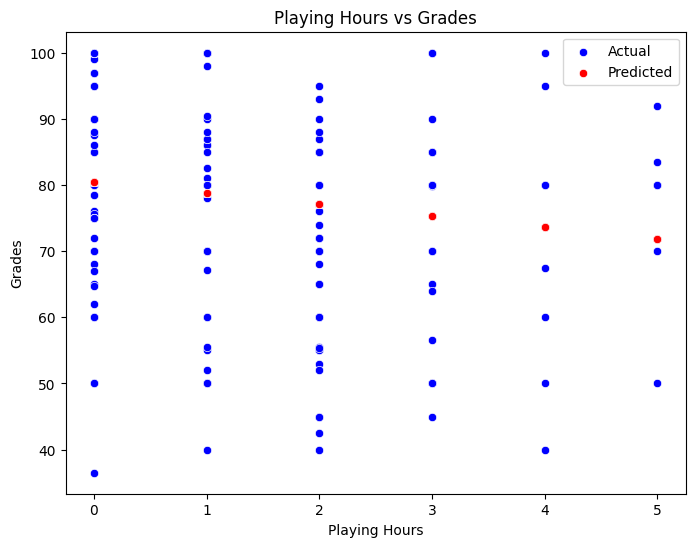

In [10]:
plt.figure(figsize=(8,6))
#scatter plot of actual data
sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")
#scatter plot of Predicted data
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Playing Hours")
plt.ylabel("Grades")
plt.title("Playing Hours vs Grades")
plt.legend()
plt.show()



In [11]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"r2 Score: {r2:.2f}")

Mean Squared Error: 291.07
r2 Score: 0.02
